In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
from PIL import Image
from IPython.display import display 
import random
import tensorflow as tf

In [2]:
img_list = pd.read_csv('../input/state-farm-distracted-driver-detection/driver_imgs_list.csv')
img_list

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg
...,...,...,...
22419,p081,c9,img_56936.jpg
22420,p081,c9,img_46218.jpg
22421,p081,c9,img_25946.jpg
22422,p081,c9,img_67850.jpg


In [3]:
img_directory = '../input/state-farm-distracted-driver-detection/imgs/train'
img_directory_test = '../input/state-farm-distracted-driver-detection/imgs/test'

In [4]:
# 4:3 ratio images at 640x480, we'll scale it down to make it easier for the network
train_ds = tf.keras.utils.image_dataset_from_directory(img_directory,validation_split=0.2 ,subset="training",seed=123, image_size =(256,192), batch_size=32)
val_ds = tf.keras.utils.image_dataset_from_directory(img_directory,validation_split=0.2 ,subset="validation",seed=123, image_size =(256,192), batch_size=32)

Found 22424 files belonging to 10 classes.
Using 17940 files for training.


2023-01-28 18:26:03.359553: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-28 18:26:03.360564: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-28 18:26:03.554284: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-28 18:26:03.555717: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-28 18:26:03.557022: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Found 22424 files belonging to 10 classes.
Using 4484 files for validation.


In [5]:
def create_model(input_dims, output_dims):
    with tf.name_scope("cnn"):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.InputLayer(input_shape=input_dims))
        model.add(tf.keras.layers.Rescaling(1./255))
        model.add(tf.keras.layers.Conv2D(32,3, activation="relu"))
        model.add(tf.keras.layers.MaxPooling2D())
        model.add(tf.keras.layers.Conv2D(64,3, activation="relu"))
        model.add(tf.keras.layers.MaxPooling2D())
        model.add(tf.keras.layers.Conv2D(128,3,activation="relu"))
        model.add(tf.keras.layers.Flatten())
        
        #fully connected layer
        model.add(tf.keras.layers.Dense(128, activation="relu"))
        model.add(tf.keras.layers.Dense(64, activation="relu"))
        model.add(tf.keras.layers.Dense(output_dims, activation="softmax"))
        
        model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
        
    return model

In [6]:
model = create_model([256,192,3], 10)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 192, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 190, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 95, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 93, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 46, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 44, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 337920)            0

In [8]:
EPOCHS = 25

history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

Epoch 1/25


2023-01-28 18:26:13.250481: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-01-28 18:26:15.599400: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


561/561 [==============================] - 94s 149ms/step - loss: 0.6724 - accuracy: 0.7827 - val_loss: 0.0514 - val_accuracy: 0.9880
Epoch 2/25
561/561 [==============================] - 56s 99ms/step - loss: 0.0335 - accuracy: 0.9906 - val_loss: 0.0500 - val_accuracy: 0.9860
Epoch 3/25
561/561 [==============================] - 54s 96ms/step - loss: 0.0320 - accuracy: 0.9909 - val_loss: 0.0442 - val_accuracy: 0.9882
Epoch 4/25
561/561 [==============================] - 53s 94ms/step - loss: 0.0166 - accuracy: 0.9947 - val_loss: 0.0558 - val_accuracy: 0.9877
Epoch 5/25
561/561 [==============================] - 57s 100ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.0246 - val_accuracy: 0.9949
Epoch 6/25
561/561 [==============================] - 57s 100ms/step - loss: 0.0187 - accuracy: 0.9944 - val_loss: 0.0490 - val_accuracy: 0.9873
Epoch 7/25
561/561 [==============================] - 56s 98ms/step - loss: 0.0092 - accuracy: 0.9976 - val_loss: 0.0546 - val_accuracy: 0.9886


In [9]:
print(sum(history.history['accuracy']) / EPOCHS)

0.9891661119461059


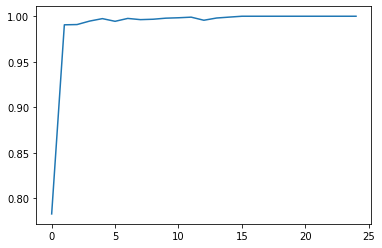

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])

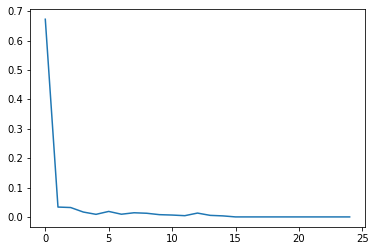

In [11]:
plt.plot(history.history['loss'])